# STOR 120 -  Lab 3: Arrays, Tables, Visualizations, & Functions

Welcome to Lab 3!

First run the cell below.

In [1]:
# Just run this cell

import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 1. Arrays

Computers are most useful when you can use a small amount of code to *do the same action* to *many different things*.

For example, in the time it takes you to calculate the 18% tip on a restaurant bill, a laptop can calculate 18% tips for every restaurant bill paid by every human on Earth that day (That's if you're pretty fast at doing arithmetic in your head!).

**Arrays** are how we put many values in one place so that we can operate on them as a group. For example, if `billions_of_numbers` is an array of numbers, the expression

    .18 * billions_of_numbers

gives a new array of numbers that contains the result of multiplying each number in `billions_of_numbers` by .18.  Arrays are not limited to numbers; we can also put all the words in a book into an array of strings.

Concretely, an array is a **collection of values of the same type**. 

## 1.1. Making arrays

First, let's learn how to manually input values into an array. This typically isn't how programs work. Normally, we create arrays by loading them from an external source, like a data file.

To create an array by hand, call the function `make_array`.  Each argument you pass to `make_array` will be in the array it returns.  Run this cell to see an example:

In [2]:
make_array(0.125, 4.75, -1.3)

array([ 0.125,  4.75 , -1.3  ])

Each value in an array (in the above case, the numbers 0.125, 4.75, and -1.3) is called an *element* of that array.

Arrays themselves are also values, just like numbers and strings.  That means you can assign them to names or use them as arguments to functions. For example, `len(<some_array>)` returns the number of elements in `some_array`.

**Question 1.1.1.** Make an array containing the numbers $\pi$, 1, -1, 0, and $e$, in that order.  Name it `interesting_numbers`.  

*Hint:* How have you found the values $\pi$ and $e$ earlier in this course?

<!--
BEGIN QUESTION
name: q111
-->

In [3]:
import math 

interesting_numbers = make_array(math.pi, 1, -1, 0, math.e)
interesting_numbers

array([ 3.14159265,  1.        , -1.        ,  0.        ,  2.71828183])

**Question 1.1.2.** Make an array containing the five strings `"Hello"`, `","`, `" "`, `"world"`, and `"!"`.  (The third one is a single space inside quotes.)  Name it `hello_world_components`.

*Note:* If you evaluate `hello_world_components`, you'll notice some extra information in addition to its contents: `dtype='<U5'`.  That's just NumPy's extremely cryptic way of saying that the data types in the array are strings.

<!--
BEGIN QUESTION
name: q112
-->

In [4]:
hello_world_components = make_array("Helle", ",", " ", "world", "!")
hello_world_components

array(['Helle', ',', ' ', 'world', '!'],
      dtype='<U5')

###  `np.arange`
Arrays are provided by a package called [NumPy](http://www.numpy.org/) (pronounced "NUM-pie"). The package is called `numpy`, but it's standard to rename it `np` for brevity.  You can do that with:

    import numpy as np

Very often in data science, we want to work with many numbers that are evenly spaced within some range.  NumPy provides a special function for this called `arange`.  The line of code `np.arange(start, stop, step)` evaluates to an array with all the numbers starting at `start` and counting up by `step`, stopping **before** `stop` is reached.

Run the following cells to see some examples!

In [5]:
# This array starts at 1 and counts up by 2
# and then stops before 6
np.arange(1, 6, 2)

array([1, 3, 5])

In [6]:
# This array doesn't contain 9
# because np.arange stops *before* the stop value is reached
np.arange(4, 9, 1)

array([4, 5, 6, 7, 8])

**Question 1.1.3.** Create an array with the multiples of 34 from 0 up to (**and including**) 3434. Its elements should be 0, 34, 68, 102, etc.

<!--
BEGIN QUESTION
name: q113
-->

In [7]:
multiples_of_34 = np.arange(0, 3435, 34)
multiples_of_34

array([   0,   34,   68,  102,  136,  170,  204,  238,  272,  306,  340,
        374,  408,  442,  476,  510,  544,  578,  612,  646,  680,  714,
        748,  782,  816,  850,  884,  918,  952,  986, 1020, 1054, 1088,
       1122, 1156, 1190, 1224, 1258, 1292, 1326, 1360, 1394, 1428, 1462,
       1496, 1530, 1564, 1598, 1632, 1666, 1700, 1734, 1768, 1802, 1836,
       1870, 1904, 1938, 1972, 2006, 2040, 2074, 2108, 2142, 2176, 2210,
       2244, 2278, 2312, 2346, 2380, 2414, 2448, 2482, 2516, 2550, 2584,
       2618, 2652, 2686, 2720, 2754, 2788, 2822, 2856, 2890, 2924, 2958,
       2992, 3026, 3060, 3094, 3128, 3162, 3196, 3230, 3264, 3298, 3332,
       3366, 3400, 3434])

##### Temperature readings
NOAA (the US National Oceanic and Atmospheric Administration) operates weather stations that measure surface temperatures at different sites around the United States.  The hourly readings are [publicly available](http://www.ncdc.noaa.gov/qclcd/QCLCD?prior=N).

Suppose we download all the hourly data from the Raleigh-Durham International Airport site for last semester, from August 15, 2022 to December 9, 2022.  To analyze the data, we want to know when each reading was taken, but we find that the data do not include the timestamps of the readings (the time at which each one was taken).

However, we know the first reading was taken at the first instant of August 15th 2022 (midnight on August 15th) and each subsequent reading was taken exactly 1 hour after the last.

**Question 1.1.4.** Create an array of the *time, in seconds, since the start of August 15th, and ending before the start of December 10th* at which each hourly reading was taken.  Name it `collection_times`.

*Hint 1:* How many days are in each month? There are 30 days in September, which is equivalent to ($30 \times 24$) hours or ($30 \times 24 \times 60 \times 60$) seconds.

<!--
BEGIN QUESTION
name: q114
-->

In [8]:
collection_times = np.arange(0, (17+91+9)*24*60*60, 60*60)
collection_times

array([       0,     3600,     7200, ..., 10098000, 10101600, 10105200])

## 1.2. Working with single elements of arrays ("indexing")
The next cell creates an array called `NCpop` that includes estimated North Carolina populations in every year from 1900 to roughly the present. The estimates come from the [FRED Economic Data](https://fred.stlouisfed.org/series/NCPOP).


In [9]:
NCpop = Table.read_table("NCpop.csv").column("NCPOP")
NCpop

array([ 1897000,  1926000,  1956000,  1986000,  2017000,  2051000,
        2077000,  2105000,  2142000,  2174000,  2221000,  2276000,
        2313000,  2362000,  2421000,  2473000,  2513000,  2546000,
        2522000,  2535000,  2588000,  2651000,  2700000,  2761000,
        2830000,  2895000,  2959000,  3027000,  3082000,  3133000,
        3167000,  3184000,  3227000,  3268000,  3304000,  3323000,
        3346000,  3385000,  3440000,  3514000,  3574000,  3589000,
        3569000,  3654000,  3560000,  3533000,  3706000,  3769000,
        3837000,  3911000,  4068000,  4120000,  4109000,  4120000,
        4131000,  4242000,  4309000,  4368000,  4376000,  4458000,
        4573000,  4663000,  4707000,  4742000,  4802000,  4863000,
        4896000,  4952000,  5004000,  5031000,  5084411,  5203531,
        5301150,  5389852,  5470911,  5547188,  5607964,  5685607,
        5759492,  5823491,  5898980,  5956653,  6019101,  6077056,
        6164006,  6253954,  6321578,  6403700,  6480594,  6565

Here's how we get the first element of `NCpop`, which is the world population in the first year in the dataset, 1900.

In [10]:
NCpop.item(0)

1897000

The value of that expression is the number 1897000 (almost 2 million), because that's the first thing in the array `NCpop`.

Notice that we wrote `.item(0)`, not `.item(1)`, to get the first element.  This is a weird convention in computer science.  0 is called the *index* of the first item.  It's the number of elements that appear *before* that item.  So 3 is the index of the 4th item.

Here are some more examples.  In the examples, we've given names to the things we get out of `NCpop`.  Read and run each cell.

In [11]:
# The 13th element in the array is the population
# in 1912 (which is 1900 + 12).
nc_pop_1912 = NCpop.item(12)
nc_pop_1912

2313000

In [12]:
# The 66th element is the population in 1965.
nc_pop_1965 = NCpop.item(65)
nc_pop_1965

4863000

In [13]:
# The array has only 122 elements, so this doesn't work.
# (There's no element with 122 other elements before it.)
nc_pop_2022 = NCpop.item(122)
population_2022

IndexError: index 122 is out of bounds for axis 0 with size 122

Since `make_array` returns an array, we can call `.item(3)` on its output to get its 4th element, just like we "chained" together calls to the method `replace` earlier.

In [ ]:
make_array(-1, -3, 4, -2).item(3)

**Question 1.2.1.** Set `population_1979` to the North Carolina population in 1979, by getting the appropriate element from `NCpop` using `item`.

<!--
BEGIN QUESTION
name: q121
-->

In [14]:
population_1979 = NCpop.item(79)
population_1979

5823491

## 1.3. Doing something to every element of an array
Arrays are primarily useful for doing the same operation many times, so we don't often have to use `.item` and work with single elements.

##### Logarithms
Here is one simple question we might ask about world population:

> How big was the population in *orders of magnitude* in each year?

Orders of magnitude quantify how big a number is by representing it as the power of another number (for example, representing 104 as $10^{2.017033}$). One way to do this is by using the logarithm function. The logarithm (base 10) of a number increases by 1 every time we multiply the number by 10. It's like a measure of how many decimal digits the number has, or how big it is in orders of magnitude.

We could try to answer our question like this, using the `log10` function from the `math` module and the `item` method you just saw:

In [15]:
nc_pop_1900_magnitude = math.log10(NCpop.item(0))
nc_pop_1901_magnitude = math.log10(NCpop.item(1))
nc_pop_1902_magnitude = math.log10(NCpop.item(2))
nc_pop_1903_magnitude = math.log10(NCpop.item(3))
...

Ellipsis

But this is tedious and doesn't really take advantage of the fact that we are using a computer.

Instead, NumPy provides its own version of `log10` that takes the logarithm of each element of an array.  It takes a single array of numbers as its argument.  It returns an array of the same length, where the first element of the result is the logarithm of the first element of the argument, and so on.

**Question 1.3.1.** Use `np.log10` to compute the logarithms of the North Carolina population in every year.  Give the result (an array of 122 numbers) the name `NCpop_magnitudes`.  Your code should be very short.

<!--
BEGIN QUESTION
name: q131
-->

In [16]:
NCpop_magnitudes = np.log10(NCpop)
NCpop_magnitudes

array([ 6.27806733,  6.28465628,  6.29136885,  6.29797924,  6.3047059 ,
        6.31196566,  6.3174365 ,  6.3232521 ,  6.33081947,  6.33725954,
        6.34654856,  6.35717226,  6.36417563,  6.37327989,  6.38399479,
        6.39322412,  6.40019249,  6.4058584 ,  6.40174508,  6.40397796,
        6.41296427,  6.42340973,  6.43136376,  6.44106641,  6.45178644,
        6.46164857,  6.47114497,  6.48101242,  6.48883263,  6.49596039,
        6.50064806,  6.50297306,  6.50879897,  6.51428205,  6.51904004,
        6.52153034,  6.52452594,  6.52955867,  6.53655844,  6.54580176,
        6.55315455,  6.55497346,  6.55254655,  6.56276854,  6.55145   ,
        6.54814364,  6.56890541,  6.57622614,  6.5839918 ,  6.59228782,
        6.60938094,  6.61489722,  6.61373614,  6.61489722,  6.61605519,
        6.62757066,  6.63437649,  6.64028263,  6.64107731,  6.64914006,
        6.6602012 ,  6.66866542,  6.6727442 ,  6.67596155,  6.68142216,
        6.68690427,  6.68984141,  6.69478064,  6.6993173 ,  6.70

What you just did is called *elementwise* application of `np.log10`, since `np.log10` operates separately on each element of the array that it's called on. Here's a picture of what's going on:

<img src="lab03-array_logarithm.jpg">


The textbook's [section](https://www.inferentialthinking.com/chapters/05/1/Arrays)  on arrays has a useful list of NumPy functions that are designed to work elementwise, like `np.log10`.

##### Arithmetic
Arithmetic also works elementwise on arrays, meaning that if you perform an arithmetic operation (like subtraction, division, etc) on an array, Python will do the operation to every element of the array individually and return an array of all of the results. For example, you can divide all the population numbers by 1 million to get numbers in millions:

In [17]:
NCpop_in_millions = NCpop / 1000000
NCpop_in_millions

array([  1.897   ,   1.926   ,   1.956   ,   1.986   ,   2.017   ,
         2.051   ,   2.077   ,   2.105   ,   2.142   ,   2.174   ,
         2.221   ,   2.276   ,   2.313   ,   2.362   ,   2.421   ,
         2.473   ,   2.513   ,   2.546   ,   2.522   ,   2.535   ,
         2.588   ,   2.651   ,   2.7     ,   2.761   ,   2.83    ,
         2.895   ,   2.959   ,   3.027   ,   3.082   ,   3.133   ,
         3.167   ,   3.184   ,   3.227   ,   3.268   ,   3.304   ,
         3.323   ,   3.346   ,   3.385   ,   3.44    ,   3.514   ,
         3.574   ,   3.589   ,   3.569   ,   3.654   ,   3.56    ,
         3.533   ,   3.706   ,   3.769   ,   3.837   ,   3.911   ,
         4.068   ,   4.12    ,   4.109   ,   4.12    ,   4.131   ,
         4.242   ,   4.309   ,   4.368   ,   4.376   ,   4.458   ,
         4.573   ,   4.663   ,   4.707   ,   4.742   ,   4.802   ,
         4.863   ,   4.896   ,   4.952   ,   5.004   ,   5.031   ,
         5.084411,   5.203531,   5.30115 ,   5.389852,   5.470

You can do the same with addition, subtraction, multiplication, and exponentiation (`**`). For example, you can calculate a tip on several restaurant bills at once (in this case just 3):

In [18]:
restaurant_bills = make_array(20.12, 39.90, 31.01)
print("Restaurant bills:\t", restaurant_bills)

# Array multiplication
tips = .2 * restaurant_bills
print("Tips:\t\t\t", tips)

Restaurant bills:	 [ 20.12  39.9   31.01]
Tips:			 [ 4.024  7.98   6.202]


<img src="lab03-array_multiplication.jpg">

**Question 1.3.2.** Suppose the total charge at a restaurant is the original bill plus the tip. If the tip is 20%, that means we can multiply the original bill by 1.2 to get the total charge.  Compute the total charge for each bill in `restaurant_bills`, and assign the resulting array to `total_charges`.

<!--
BEGIN QUESTION
name: q532
-->

In [19]:
total_charges = restaurant_bills * 1.2
total_charges

array([ 24.144,  47.88 ,  37.212])

**Question 1.3.3.** The array `more_restaurant_bills_array` contains 100,000 bills!  Compute the total charge for each one.  How is your code different?

<!--
BEGIN QUESTION
name: q133
-->

In [20]:
more_restaurant_bills_array = Table.read_table("more_restaurant_bills.csv").column("Bill")
more_total_charges = more_restaurant_bills_array * 1.2
more_total_charges

array([ 20.244,  20.892,  12.216, ...,  19.308,  18.336,  35.664])

The function `sum` takes a single array of numbers as its argument.  It returns the sum of all the numbers in that array (so it returns a single number, not an array).

**Question 1.3.4.** What was the sum of all the bills in `more_restaurant_bills_array`, *including tips*? Round your answer to the nearest cent.

<!--
BEGIN QUESTION
name: q134
-->

In [21]:
sum_of_bills = float(round(sum(more_total_charges), 2))
sum_of_bills

1795730.06

## 2. Creating Tables

An array is useful for describing a single attribute of each element in a collection. For example, let's say our collection is all US States. Then an array could describe the land area of each state. 

Tables extend this idea by containing multiple arrays, each one describing a different attribute for every element of a collection. In this way, tables allow us to not only store data about many entities but to also contain several kinds of data about each entity.

For example, in the cell below we have two arrays. The first one, `NCpop`, was defined above in section 1.2 and contains the North Carolina population in each year. The second array, `years`, contains the years themselves. These elements are in order, so the year and the North Carolina population for that year have the same index in their corresponding arrays.

In [22]:
# Just run this cell

years = np.arange(1900, 2021+1)
print("Population column:", NCpop)
print("Years column:", years)

Population column: [ 1897000  1926000  1956000  1986000  2017000  2051000  2077000  2105000
  2142000  2174000  2221000  2276000  2313000  2362000  2421000  2473000
  2513000  2546000  2522000  2535000  2588000  2651000  2700000  2761000
  2830000  2895000  2959000  3027000  3082000  3133000  3167000  3184000
  3227000  3268000  3304000  3323000  3346000  3385000  3440000  3514000
  3574000  3589000  3569000  3654000  3560000  3533000  3706000  3769000
  3837000  3911000  4068000  4120000  4109000  4120000  4131000  4242000
  4309000  4368000  4376000  4458000  4573000  4663000  4707000  4742000
  4802000  4863000  4896000  4952000  5004000  5031000  5084411  5203531
  5301150  5389852  5470911  5547188  5607964  5685607  5759492  5823491
  5898980  5956653  6019101  6077056  6164006  6253954  6321578  6403700
  6480594  6565459  6656987  6748135  6831850  6947412  7060959  7185403
  7307658  7428672  7545828  7650789  8081614  8210122  8326201  8422501
  8553152  8705407  8917270  911

Suppose we want to answer this question:

> In which year did the North Carolina's population cross 7 million?

You could technically answer this question by importing and viewing the full NCpop table that includes the years, or just from staring at the arrays and counting the position where the population first crossed 7 million. We won't do that since we want how to learn to do these things when those methods may not be available. 

The expression below:

- creates an empty table using the expression `Table()`,
- adds two columns by calling `with_columns` with four arguments,
- assigns the result to the name `population`, and finally
- evaluates `population` so that we can see the table.

The strings `"Year"` and `"Population"` are column labels that we have chosen. The names `NCpop` and `years` were assigned above to two arrays of the **same length**. The function `with_columns` takes in alternating strings (to represent column labels) and arrays (representing the data in those columns). The strings and arrays are separated by commas.

In [23]:
population = Table().with_columns(
    "Population", NCpop,
    "Year", years
)
population

Population,Year
1897000,1900
1926000,1901
1956000,1902
1986000,1903
2017000,1904
2051000,1905
2077000,1906
2105000,1907
2142000,1908
2174000,1909


Now the data is combined into a single table! It's much easier to parse this data. If you need to know what the population was in 1959, for example, you can tell from a single glance.

## 3. More Table Operations!

Now that you've worked with arrays, let's add a few more methods to the list of table operations that you saw in Lab 2. Run the cell below

In [24]:
# Returns a table of the amount of restaurant bills
more_restaurant_bills = Table.read_table("more_restaurant_bills.csv")
more_restaurant_bills

Bill
16.87
17.41
10.18
9.84
18.44
8.99
39.72
3.55
4.65
5.61


### `column`

`column` takes the column name of a table (in string format) as its argument and returns the values in that column as an **array**.  Run the cell below.

In [25]:
# Returns an array of the amount of restaurant bills
more_restaurant_bills.column('Bill')

array([ 16.87,  17.41,  10.18, ...,  16.09,  15.28,  29.72])

Note that both the array above and the table `more_restaurant_bills` only have data for one variable, but their structures are different. Many functions that we will use expect the data to be in either an array format or a table format, but can not handle both.

### `take`
The table method `take` takes as its argument an array of numbers.  Each number should be the index of a row in the table.  It returns a **new table** with only those rows. 

You'll usually want to use `take` in conjunction with `np.arange` to take the first few rows of a table.

In [26]:
# Take first 100 amounts of restaurant bills
more_restaurant_bills.take(np.arange(0, 100, 1))

Bill
16.87
17.41
10.18
9.84
18.44
8.99
39.72
3.55
4.65
5.61


The next questions will give you practice with combining the operations you've learned in this lab and the previous one to answer questions about the `population` table. First, check out the `population` table from section 2.

In [27]:
# Run this cell to display the population table.
population

Population,Year
1897000,1900
1926000,1901
1956000,1902
1986000,1903
2017000,1904
2051000,1905
2077000,1906
2105000,1907
2142000,1908
2174000,1909


**Question 3.1.** Compute the year when the North Carolina population first went above 7 million. Assign the year to `year_NCpop_crossed_7_million`. 
<!--
BEGIN QUESTION
name: q31
-->

In [28]:
year_NCpop_crossed_7_million = population.where(
    'Population', are.above(7000000)).column(
    'Year').item(0)
year_NCpop_crossed_7_million

1994

**Question 3.2.** Find the average yearly change in North Carolina's population during the Baby Boomers generation (years from 1946 and 1965 (inclusive)) and the average yearly change in North Carolina population for the Millennials generation (years from 1981 and 1997 (inclusive)). You should round to the nearest whole number. Note that birth years for baby boomers actually end in 1964 and for millenials in 1996. We are using the one year later for the end years in the population data so that we can look at the population growth from 1964-1965 and 1996-1997 as well.

*Hint*: Think of the steps you need to do and try to put them in an order that makes sense.

*Hint*: In a previous assignment you used a function that calculated the differences between adjacent values in an array

<!--
BEGIN QUESTION
name: q42
-->

In [29]:
Boomers = round(np.mean(np.diff(
    population.where(
        'Year', are.between_or_equal_to(
            1946, 1965)).column('Population'))))
Millennials = round(np.mean(np.diff(
    population.where(
        'Year', are.between_or_equal_to(
            1981, 1997)).column('Population'))))
print("Average yearly change in North Carolina's population for the Baby Boomers generation:", Boomers)
print("Average yearly change in North Carolina's population for the Millennials generation", Millennials)

Average yearly change in North Carolina's population for the Baby Boomers generation: 60895
Average yearly change in North Carolina's population for the Millennials generation 92001


## 4. Visualizations

Tables are a powerful way of organizing and visualizing data. However, large tables of numbers can be difficult to interpret, no matter how organized they are. Sometimes it is much easier to interpret graphs than numbers. Next you will use some fundamental graphical methods of data analysis to view the data from tables in a different way.

### `plot`

Line plots, sometimes known as line graphs, are among the most common visualizations. They are often used to study chronological trends and patterns. `plot` is a table function that will construct a line plot for a `table` when we specify the column labels and the variables that we want on the horizontal axis, `column_label_x`, and the vertical axis, `column_label_y`.

`table.plot(column_label_x, column_label_y)`

**Question 4.1.** Construct a line plot using the `population` table to plot the North Carolina population over time. Plot `Year` on the horizontal axis and `Population` on the vertical axis.

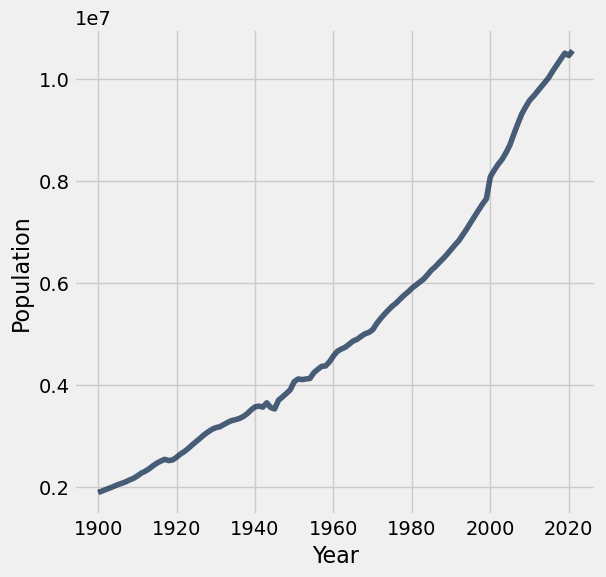

In [30]:
population.plot('Year', 'Population')

Run the cell below to load the table `primary_results`. This table has the votes for each candidate or ballot choice in every contest held in North Carolina in the May 8, 2018 elections.

In [31]:
primary_results = Table.read_table('primary_results.csv')
primary_results.show(5)

contest_name,choice,sum_total_votes
ALAMANCE COUNTY BOARD OF COMMISSIONERS (DEM),Harold Dean Bowling,1073
ALAMANCE COUNTY BOARD OF COMMISSIONERS (DEM),Kristen Powers,4159
ALAMANCE COUNTY BOARD OF COMMISSIONERS (DEM),Robert E. (Bob) Byrd,3842
ALAMANCE COUNTY BOARD OF COMMISSIONERS (REP),Amy Scott Galey,5272
ALAMANCE COUNTY BOARD OF COMMISSIONERS (REP),Robert L. Simpson,3756


**Question 4.2.** Construct a table `OCBOE` containing only the rows for the `contest_name` of `ORANGE COUNTY BOARD OF EDUCATION` and containing only the columns of `choice` and `sum_total_votes`. The table should be sorted in decreasing order by `sum_total_votes`.

In [32]:
OCBOE = primary_results.where('contest_name', 'ORANGE COUNTY BOARD OF EDUCATION').select(
    'choice', 'sum_total_votes').sort('sum_total_votes', descending = 1)
OCBOE

choice,sum_total_votes
Brenda Stephens,6114
Sarah Smylie,5439
Hillary MacKenzie,5163
Will Atherton,4810
Jessica Aguilar,1653
Mike O'Hagerty,966
James Needham,935
Hawkeye Aguilar,796
Write-In (Miscellaneous),109
Lisa Knapp (Write-In),13


### `barh`

The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category. `barh` is a table function that will construct a horizontal bar chart for a table when we specify the column label of the categorical variable that we are counting, `cat_variable`, and the column label for the counts of that variable, `counts`.

`table.barh(cat_variable, counts)`

**Question 4.3.** Construct a bar chart for the number of votes for each of the candidates in the `OCBOE` table.

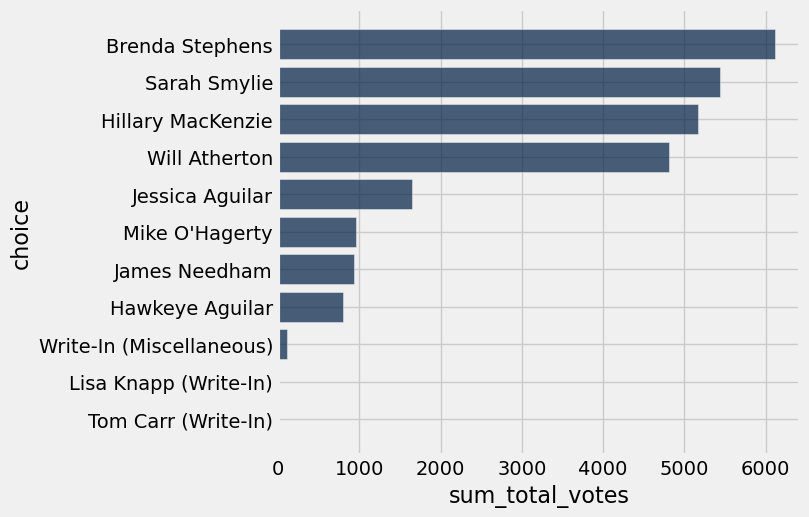

In [33]:
OCBOE.barh('choice', 'sum_total_votes')

Run the cell below to load the `Local_Air_Quality` table. This dataset contains air quality data collected using a PurpleAir Dual Laser Air Quality Sensor located at the Chapel Hill Public Library, as well as data on other variables such as temperature in Fahrenheit.

In [34]:
Local_Air_Quality = Table.read_table("Local_Air_Quality.csv")
Local_Air_Quality.show(5)

X,Y,Last_Check,Current_Particulate_Matter_2_5,PM_2_5_10_Minute_Avg,PM_2_5_30_Minute_Avg,PM_2_5_1_Hour_Avg,PM_2_5_6_Hour_Avg,PM_2_5_24_Hour_Avg,PM_2_5_One_Week_Avg,Temp_F,Humidity,Pressure__mbar,Site_Label,Inside_Outside,Latitude,Longitude,Uptime_Seconds,RSSI_WiFi_signal_strength_dBm,Hardware_Issues,Age_of_Data_at_Check_minutes,ObjectId
-79.0357,35.9325,2018/09/27 19:48:03+00,22.48,22.05,18.33,15.5,10.25,11.44,13.81,88,59,1002.78,Chapel Hill Public Library,outside,35.9325,-79.0357,3060,-84,nan,1,1
-79.0357,35.9325,2018/09/27 19:59:52+00,23,22.47,19.2,16.24,10.46,11.49,13.82,88,58,1003.02,Chapel Hill Public Library,outside,35.9325,-79.0357,3770,-84,nan,0,2
-79.0357,35.9325,2018/10/02 14:43:38+00,9.32,10.53,13.64,15.65,18.14,14.53,12.89,86,55,1011.93,Chapel Hill Public Library,outside,35.9325,-79.0357,7123,-92,nan,0,3
-79.0357,35.9325,2018/10/02 14:43:38+00,9.32,10.53,13.64,15.65,18.14,14.53,12.89,86,55,1011.93,Chapel Hill Public Library,outside,35.9325,-79.0357,7123,-92,nan,0,4
-79.0357,35.9325,2018/10/02 14:59:23+00,8,9.25,12.58,14.91,17.97,14.51,12.89,86,54,1011.81,Chapel Hill Public Library,outside,35.9325,-79.0357,100,-86,nan,0,5


### `scatter`

A scatter plot displays the relation between two numerical variables. `scatter` is a table function that draws a scatter plot consisting of one point for each row of the table. Its first argument is the label of the column to be plotted on the horizontal axis, `x_label`, and its second argument is the label of the column on the vertical axis, `y_label`.

`table.scatter(x_label, y_label)`

**Question 4.4.** Construct a scatterplot with the variable `Humidity` on the horizontal axis and `Pressure__mbar` on the vertical axis. Note that there are two underscores in the name `Pressure__mbar`

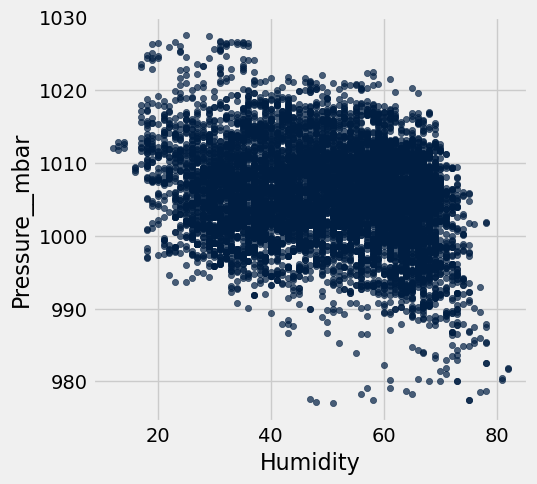

In [35]:
Local_Air_Quality.scatter('Humidity', 'Pressure__mbar')

**Question 4.5.** Comment on the relationship between `Humidity` and `Pressure__mbar` shown in the plot from the previous question.

*There is a slight negative correlation, but it's not very strong at all*

## 5. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50 (no percent sign).

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Like other names we've defined, it can't start with a number or contain spaces. Let's call our function `to_percentage`:
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  A function can have any number of arguments (including 0!). 

`to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)
    
If we want our function to take more than one argument, we add a comma between each argument name. Note that if we had zero arguments, we'd still place the parentheses () after than name. 

We put a colon after the signature to tell Python it's over. If you're getting a syntax error after defining a function, check to make sure you remembered the colon!

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing an **indented** triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function and every line **must be indented with a tab**.  Any lines that are *not* indented and left-aligned with the def statement is considered outside the function. 

Some notes about the body of the function:
- We can write code that we would write anywhere else.  
- We use the arguments defined in the function signature. We can do this because we assume that when we call the function, values are already assigned to those arguments.
- We generally avoid referencing variables defined *outside* the function. If you would like to reference variables outside of the function, pass them through as arguments!


Now, let's give a name to the number we multiply a proportion by to get a percentage:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
        
`return` only makes sense in the context of a function, and **can never be used outside of a function**. `return` is always the last line of the function because Python stops executing the body of a function once it hits a `return` statement.

*Note:*  `return` inside a function tells Python what value the function evaluates to. However, there are other functions, like `print`, that have no `return` value. For example, `print` simply prints a certain value out to the console. 

`return` and `print` are **very** different. 

**Question 5.1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion .6 to a percentage.  Name that percentage `sixty_percent`.

<!--
BEGIN QUESTION
name: q51
-->

In [36]:
def to_percentage(proportion):
    """ Converts a proportion to a percentage """
    factor = 100
    return proportion * factor

sixty_percent = to_percentage(.6)
sixty_percent

60.0

Like you’ve done with built-in functions in previous labs (max, abs, etc.), you can pass in named values as arguments to your function.

**Question 5.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Like other named values, functions stick around after you define them.

<!--
BEGIN QUESTION
name: q52
-->

In [37]:
a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

Here's something important about functions: the names assigned *within* a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even if you created a variable called `factor` and defined `factor = 100` inside of the body of the `to_percentage` function and then called `to_percentage`, `factor` would not have a value assigned to it outside of the body of `to_percentage`:

In [38]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

NameError: name 'factor' is not defined

As we've seen with built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 5.3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".) You can use as many lines inside of the function to do this as you’d like.

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  The `.replace` method for strings returns a new string, so you can call `replace` multiple times, one after the other. 

<!--
BEGIN QUESTION
name: q53
-->

In [39]:
def disemvowel(a_string):
    """Removes vowels from strings"""
    new = a_string.replace('a', '').replace('e', '').replace('i', '').replace('o', '').replace('u', '')
    
    return new

# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the jam filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 5.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  That number should be the number of characters in the argument string that aren't vowels. You should use the `disemvowel` function you wrote above inside of the `num_non_vowels` function.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

<!--
BEGIN QUESTION
name: q54
-->

In [40]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return len(disemvowel(a_string))

# Try calling your function yourself to make sure the output is what you expect.
print(num_non_vowels('Panera is expensive'))

11


Functions can also encapsulate code that *displays output* instead of computing a value. For example, if you call `print` inside a function, and then call that function, something will get printed.

The `Bachelors` dataset contains information from 2019 on the number of people from the United States with bachelor's degrees in various fields of study broken down by age group, sex, and state. The original source of the data is the US Census Bureau, but this dataset was found on [Kaggle.com](https://www.kaggle.com/tjkyner/bachelor-degree-majors-by-age-sex-and-state). Suppose you'd like to display the state with the 3rd-highest number of bachelor's degrees for females 25 and older, and that state's number of females with bachelor's degrees, printed in a human-readable way. You might do this:

In [41]:
Bachelors = Table.read_table("Bachelors.csv")
rank = 3

bach_state_25_older_f_sorted = Bachelors.where(
    'Age Group', '25 and older').where(
    'Sex', 'Female').sort(
    "Bachelor's Degree Holders", descending=True)

state_rank_3 = bach_state_25_older_f_sorted.column('State').item(rank-1)
num_bach_rank_3 = bach_state_25_older_f_sorted.column("Bachelor's Degree Holders").item(rank-1)

print(state_rank_3, 
      "has a rank of", 
      rank, 
      "among the states with the highest number of bachelor's degrees for females 25 years and older with",
      num_bach_rank_3,
      "people with bachelor's degrees"
     )


New York has a rank of 3 among the states with the highest number of bachelor's degrees for females 25 years and older with 2791891 people with bachelor's degrees


After writing this, you realize you also wanted to print out the states and their number of people with bachelor's degrees for the 1st and 2nd-highest states as well.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 5.5.** Write a function called `print_kth_top_bach_f_state`.  It should take a single argument, the rank of the state (like 1, 2, or 3 in the above examples).  It should print out a message like the one above.  

*Note:* Your function shouldn't have a `return` statement.

<!--
BEGIN QUESTION
name: q45
-->

In [42]:
def print_kth_top_bach_f_state(k):
    state = bach_state_25_older_f_sorted.column('State').item(k-1)
    num_bach = bach_state_25_older_f_sorted.column("Bachelor's Degree Holders").item(k-1)
    print(state, 'has a rank of', k,
         'among the states with the highest number of bachelor\'s degrees for females 25 years and older with',
         num_bach, 'people with bachelor\'s degrees')

# Example calls to your function:
print_kth_top_bach_f_state(1)
print_kth_top_bach_f_state(2)

California has a rank of 1 among the states with the highest number of bachelor's degrees for females 25 years and older with 4868520 people with bachelor's degrees
Texas has a rank of 2 among the states with the highest number of bachelor's degrees for females 25 years and older with 2991987 people with bachelor's degrees


### `print` is not the same as `return`
The `print_kth_top_bach_state` function prints the state and the total number of people with bachelor's degrees for the rank that was provided. However, since we did not return any value in this function, we can not use it after we call it. Let's look at an example of another function that prints a value but does not return it.

In [43]:
def print_number_five():
    print(5)

In [44]:
print_number_five()

5


However, if we try to use the output of `print_number_five()`, we see that the value `5` is printed but we get a TypeError when we try to add the number 2 to it!

In [45]:
print_number_five_output = print_number_five()
print_number_five_output + 2

5


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

It may seem that `print_number_five()` is returning a value, 5. In reality, it just displays the number 5 to you without giving you the actual value! If your function prints out a value without returning it and you try to use that value, you will run into errors, so be careful!

Explain to your neighbor how you might add a line of code to the `print_number_five` function (after `print(5)`) so that the code `print_number_five_output + 5` would result in the value `10`, rather than an error.

## 6. Functions and Vice Chancellor Incomes

In this question, we'll look at the `vc_compensation2023` dataset, containing the 2023 compensation for those with 'Vice Chancellor' in their primary working title across North Carolina public universities. This data, and much else about state employees, is publicly available. 

In [46]:
vc_compensation2023 = Table.read_table('vc_compensation2023.csv')
vc_compensation2023

INSTITUTION NAME,LAST NAME,FIRST NAME,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE
FSU,Robinson,Terrance,10-Apr-00,"Chief Business Affairs Officer, College/Division",$108675,"Legal, Audit, Risk and Compliance","Assistant Vice Chancellor for Legal, Risk, Audit and Com ..."
ECSU,Aponte,Ariel,1-Sep-22,"Government Relations Professional, Federal Relations Dir ...",$ 109000,Student Affairs,"Associate Vice Chancellor for Military, State, & Federal ..."
NCCU,Clemm,William,1-Jul-19,"Director, Subdivision/Unit/Program AD",$ 109270,Office of AVC Student Engagement,Assistant Vice Chancellor Student Affairs
ECSU,Wade,Kevin,22-Jun-07,"Associate Vice Chancellor, Student Affairs",$ 109801,Student Affairs,Associate Vice Chancellor for Student Affairs
NCA&T,Bostick,Keyona,18-Nov-22,Chief Campus HR Information Systems Administrator,$ 110000,Human Resources,Assistant Vice Chancellor for HR Operations
NCA&T,Chisholm,Allison,29-Jun-15,Deputy Chief HR Officer,$ 110000,Human Resources,Assistant Vice Chancellor for Talent Management
UNCA,Barnwell,Vollie,18-Oct-99,"Assistant Vice Chancellor, Student Affairs",$ 110000,Housing Operations,Assistant Vice Chancellor for Student Affairs
UNCSA,Mahoney,Angela,11-May-98,Chief Human Resources Officer,$ 111392,Human Resources,Associate Vice Chancellor of Human Resources
WSSU,Gingles,Haley,1-Mar-20,Chief Communications /Public Relations Officer,$ 112737.38,Marketing & Communications,Vice Chancellor of Communication/Chief Marketing
ECSU,Lane,Shamica,1-Sep-20,Chief Human Resources Officer,$ 115270,Human Resources,Asst Vice Chancellor/CHRO


We want to compute the average of the Vice Chancellors' pay. Try running the cell below.

In [47]:
np.average(vc_compensation2023.column("EMPLOYEE ANNUAL BASE SALARY"))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

You should see a TypeError. Let's examine why this error occurred by looking at the values in the `EMPLOYEE ANNUAL BASE SALARY` column. 

**Question 6.1.** Use the `type` function and set `base_salary_type` to the type of the first value in the `EMPLOYEE ANNUAL BASE SALARY` column.

<!--
BEGIN QUESTION
name: q51
-->

In [62]:
base_salary_type = type(vc_compensation2023.column("EMPLOYEE ANNUAL BASE SALARY").item(0))
base_salary_type

str

**Question 6.2.** You should have found that the values in the `EMPLOYEE ANNUAL BASE SALARY` column are strings. It doesn't make sense to take the average of string values, so we need to convert them to numbers if we want to do this. Extract the first value in `EMPLOYEE ANNUAL BASE SALARY` and assign it to `fsu_vc_string`

<!--
BEGIN QUESTION
name: q52
-->

In [63]:
fsu_vc_string = vc_compensation2023.column("EMPLOYEE ANNUAL BASE SALARY").item(0)
fsu_vc_string

'$108675'

**Question 6.3.** Convert `fsu_vc_string` to a number of *dollars* and assign this to `fsu_vc_pay`. 

Some hints, as this question requires multiple steps:
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  

<!--
BEGIN QUESTION
name: q53
-->

In [64]:
fsu_vc_pay = float(fsu_vc_string.strip('$'))
fsu_vc_pay

108675.0

To compute the average pay, we need to do this for every Vice Chancellor. But that looks like it would involve copying this code 169 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "EMPLOYEE ANNUAL BASE SALARY" strings to numeric values.  Later in this lab, we'll see the payoff: we can call that function on every salary string in the dataset at once.

**Question 6.4.** Copy the expression you used to compute `fsu_vc_pay`, and use it as the return expression of the function below. But make sure you replace the specific `fsu_vc_string` with the generic `base_salary_string` name specified in the first line in the `def` statement.

*Hint*: When dealing with functions, you should generally not be referencing any variable outside of the function. Usually, you want to be working with the arguments that are passed into it, such as `base_salary_string` for this function. If you're using `fsu_vc_pay` within your function, you're referencing an outside variable!

<!--
BEGIN QUESTION
name: q54
-->

In [65]:
def convert_base_salary_string_to_number(base_salary_string):
    """Converts a base salary string like '$100000' to a number of dollars."""
    
    return float(base_salary_string.strip('$'))

Running that cell doesn't convert any particular base salary string. Instead, it creates a function called `convert_base_salary_string_to_number` that can convert *any* string with the right format to a number representing dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument -- a string -- and it returns a float.

In [66]:
convert_base_salary_string_to_number('$42')

42.0

In [67]:
convert_base_salary_string_to_number(fsu_vc_string)

108675.0

In [68]:
# We can also compute UNC-CH's Chief Information / IT Officer in the same way:
convert_base_salary_string_to_number(vc_compensation2023.where(
    "INSTITUTION NAME", 'UNC-CH').where(
    'JOB CATEGORY', 'Chief Information / IT Officer').column(
    "EMPLOYEE ANNUAL BASE SALARY").item(0))

358239.0

So, what have we gained by defining the `convert_base_salary_string_to_number` function? 
Well, without it, we'd have to copy the code `float(some_pay_string.strip("$"))` each time we wanted to convert a pay string. Now we just call a function whose name says exactly what it's doing.

## 7. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "data"!

For example, we can make a new name for the built-in function `max` if we want:

In [69]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [70]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [71]:
max

<function max>

Now try writing `?max` or `?our_name_for_max` (or the name of any other function) in a cell, and run that cell.  An information box should show up at the bottom of your screen a longer description of the function

*Note: You can also press Shift+Tab after clicking on a name to see similar information!*

In [72]:
?our_name_for_max

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

Let's look at what happens when we set `max`to a non-function value. You'll notice that a TypeError will occur when you try calling `max`. Things like integers and strings are not callable. Look out for any functions that might have been renamed when you encounter this type of error

In [73]:
max = 6
max(2, 6)

TypeError: 'int' object is not callable

In [74]:
# This cell resets max to the built-in function. Just run this cell, don't change its contents
import builtins
max = builtins.max

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [75]:
make_array(max, np.average, are.equal_to)

array([<built-in function max>, <function average at 0x000001C6BE91F4C0>,
       <function are.equal_to at 0x000001C6C2DE5C60>], dtype=object)

**Question 7.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

<!--
BEGIN QUESTION
name: q71
-->

In [76]:
some_functions = make_array( np.mean, min, np.diff)
some_functions

array([<function mean at 0x000001C6BE801300>, <built-in function min>,
       <function diff at 0x000001C6BE91FEC0>], dtype=object)

Working with functions as values can lead to some funny-looking code. For example, see if you can figure out why the following code works.

In [77]:
make_array(max, np.average, are.equal_to).item(0)(4, -2, 7)

7

A more useful example of passing functions to other functions as arguments is the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an *array* of the results.  Here we use `apply` to convert every Vice Chancellor's pay to a number, using the function you defined:

In [78]:
vc_compensation2023.apply(convert_base_salary_string_to_number, "EMPLOYEE ANNUAL BASE SALARY")

array([ 108675.  ,  109000.  ,  109270.  ,  109801.  ,  110000.  ,
        110000.  ,  110000.  ,  111392.  ,  112737.38,  115270.  ,
        115347.  ,  119025.  ,  120000.  ,  120000.  ,  122425.  ,
        123062.  ,  124387.  ,  124653.  ,  125000.  ,  125000.  ,
        125353.  ,  127305.  ,  129375.  ,  129418.  ,  131549.  ,
        131917.  ,  132609.  ,  133394.  ,  133548.  ,  133808.69,
        137655.  ,  137810.  ,  137914.  ,  137914.  ,  139000.  ,
        139725.  ,  139813.  ,  140000.  ,  141361.  ,  142313.  ,
        143218.  ,  148523.  ,  149583.  ,  150768.  ,  151000.  ,
        151000.  ,  151705.  ,  153827.  ,  155000.  ,  155000.  ,
        157320.  ,  157589.  ,  157832.  ,  158000.  ,  159131.  ,
        159131.  ,  159131.  ,  160192.  ,  163628.  ,  163670.  ,
        164306.  ,  164436.  ,  164818.  ,  170000.  ,  170884.  ,
        173454.  ,  173581.  ,  175000.  ,  175000.  ,  175000.  ,
        175044.  ,  175950.  ,  176488.87,  179819.  ,  180000

Note that we didn’t write `vc_compensation2023.apply(convert_base_salary_string_to_number(), “EMPLOYEE ANNUAL BASE SALARY”)` or `vc_compensation2023.apply(convert_base_salary_string_to_number(“EMPLOYEE ANNUAL BASE SALARY”))`. We just passed the name of the function, with no parentheses, to `apply`, because all we want to do is let `apply` know the name of the function we’d like to use and the name of the column we’d like to use it on. `apply` will then call the function `convert_base_salary_string_to_number` on each value in the column for us!

**Question 7.2.** Using `apply`, make a table that's a copy of `vc_compensation2023` with one additional column called `Base Salary ($)`.  That column should contain the result of applying `convert_base_salary_string_to_number` to the `EMPLOYEE ANNUAL BASE SALARY` column (as we did above).  Call the new table `compensation`.

<!--
BEGIN QUESTION
name: q72
-->

In [80]:
compensation = vc_compensation2023.with_column(
    "Base Salary ($)",
    vc_compensation2023.apply(convert_base_salary_string_to_number, 'EMPLOYEE ANNUAL BASE SALARY')
    )
compensation

INSTITUTION NAME,LAST NAME,FIRST NAME,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE,Base Salary ($)
FSU,Robinson,Terrance,10-Apr-00,"Chief Business Affairs Officer, College/Division",$108675,"Legal, Audit, Risk and Compliance","Assistant Vice Chancellor for Legal, Risk, Audit and Com ...",108675
ECSU,Aponte,Ariel,1-Sep-22,"Government Relations Professional, Federal Relations Dir ...",$ 109000,Student Affairs,"Associate Vice Chancellor for Military, State, & Federal ...",109000
NCCU,Clemm,William,1-Jul-19,"Director, Subdivision/Unit/Program AD",$ 109270,Office of AVC Student Engagement,Assistant Vice Chancellor Student Affairs,109270
ECSU,Wade,Kevin,22-Jun-07,"Associate Vice Chancellor, Student Affairs",$ 109801,Student Affairs,Associate Vice Chancellor for Student Affairs,109801
NCA&T,Bostick,Keyona,18-Nov-22,Chief Campus HR Information Systems Administrator,$ 110000,Human Resources,Assistant Vice Chancellor for HR Operations,110000
NCA&T,Chisholm,Allison,29-Jun-15,Deputy Chief HR Officer,$ 110000,Human Resources,Assistant Vice Chancellor for Talent Management,110000
UNCA,Barnwell,Vollie,18-Oct-99,"Assistant Vice Chancellor, Student Affairs",$ 110000,Housing Operations,Assistant Vice Chancellor for Student Affairs,110000
UNCSA,Mahoney,Angela,11-May-98,Chief Human Resources Officer,$ 111392,Human Resources,Associate Vice Chancellor of Human Resources,111392
WSSU,Gingles,Haley,1-Mar-20,Chief Communications /Public Relations Officer,$ 112737.38,Marketing & Communications,Vice Chancellor of Communication/Chief Marketing,112737
ECSU,Lane,Shamica,1-Sep-20,Chief Human Resources Officer,$ 115270,Human Resources,Asst Vice Chancellor/CHRO,115270


Now that we have all the pays as numbers, we can learn more about them through computation.

**Question 7.3.** Compute the average base salary of the Vice Chancellors in the dataset (assume that everyone in the data is a Vice Chancellor).

<!--
BEGIN QUESTION
name: q73
-->

In [82]:
average_base_salary = np.average(compensation.column("Base Salary ($)"))
average_base_salary

205751.12390532542

**Why is `apply` useful?**

For operations like arithmetic, or the functions in the NumPy library, you don't need to use `apply`, because they automatically work on each element of an array.  But there are many things that don't.  The string manipulation we did in today's lab is one example.  Since you can write any code you want in a function, `apply` gives you total control over how you operate on data.

## 8. Histograms
Earlier, we computed the average pay among the 169 Vice Chancellors in our dataset.  The average doesn't tell us everything about the amounts Vice Chancellors are paid, though.  Maybe just a few Vice Chancellors make the bulk of the money.

We can use a *histogram* method to display the *distribution* of a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 8.1.** Make a histogram of the base salary of the Vice Chancellors in `compensation`. Check with your neighbor or a staff member to make sure you have the right plot. Construct the bins of your histogram to begin at \\$75,000, have bin widths of \\$25,000, and include all salaries.

*Note:* When you answer this question, you may encounter a red box appearing below your code cell that says something like `FixedFormatter should only be used together with FixedLocator`. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error. 

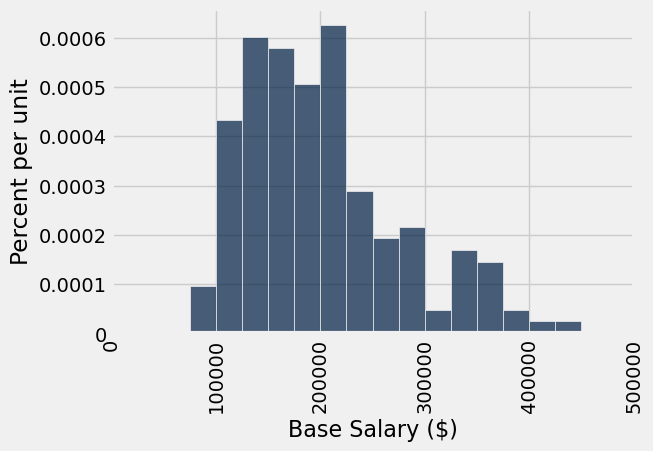

In [87]:
compensation.hist("Base Salary ($)", bins = np.arange(75000, 500000, 25000))

**Question 8.2.** How many Vice Chancellors made $250,000 or more in base salary? First find the value using code

*Hint:* Use the table method `where` and the property `num_rows`.

<!--
BEGIN QUESTION
name: q72
-->

In [92]:
num_vcs_250k_or_more = compensation.where("Base Salary ($)", are.above_or_equal_to(25000)).num_rows
num_vcs_250k_or_more

169

**Question 8.3.** How could you use the histogram to determine (maybe not so accurately) how many Vice Chancellors $250,000 or more in base salary?

<!--
BEGIN QUESTION
name: q73
-->

*You could determine the percent of Vice Chancellors making that much by adding up the heights of the bins from $250,000 on. Then you'd have to apply that percent to the total number of VCs.*

# You're done with Lab 3! 
Save the Jupyter Notebook and submit it to Gradescope.